# Tricks of the trade TF/Keras [small dataset]

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras. It uses a small data set so that it can be trained on the CPU.

Below are several experiments.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('../data/mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

Keras 2.2.4 TF 1.13.0-rc1 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
(4000, 1, 28, 28) (4000,) 28


Using TensorFlow backend.


### Suggestions for the experiment

Let the experiments run for 100 epochs. You might need to restart the kernel so that namings of the layers are the same

* with init zero 
* with sigmoid activation 
* with ReLU activation
* with dropout (p=0.3)
* with batch-normalization and dropout

In [2]:
### First model with all zeros
name = 'sigmoid_init0'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784), kernel_initializer='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(50,kernel_initializer='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax',kernel_initializer='zero'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Untrained model


In [3]:
-np.log(0.1)

2.3025850929940455

In [4]:
model.evaluate(X[0:2000], convertToOneHot(y[0:2000],10))

2000/2000 [==============================] - 0s 152us/step


[2.3025851249694824, 0.0955]

In [5]:
model.predict_classes(X[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)
K.clear_session()

Instructions for updating:
Use tf.cast instead.
Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 0s - loss: 2.3036 - acc: 0.1025 - val_loss: 2.2981 - val_acc: 0.1233
Epoch 2/50
 - 0s - loss: 2.3031 - acc: 0.1075 - val_loss: 2.2997 - val_acc: 0.1233
Epoch 3/50
 - 0s - loss: 2.3027 - acc: 0.1071 - val_loss: 2.2999 - val_acc: 0.1067
Epoch 4/50
 - 0s - loss: 2.3030 - acc: 0.1012 - val_loss: 2.2983 - val_acc: 0.1033
Epoch 5/50
 - 0s - loss: 2.3028 - acc: 0.1025 - val_loss: 2.2994 - val_acc: 0.1067
Epoch 6/50
 - 0s - loss: 2.3024 - acc: 0.1017 - val_loss: 2.3005 - val_acc: 0.1033
Epoch 7/50
 - 0s - loss: 2.3026 - acc: 0.1021 - val_loss: 2.3005 - val_acc: 0.1033
Epoch 8/50
 - 0s - loss: 2.3026 - acc: 0.1029 - val_loss: 2.2983 - val_acc: 0.1067
Epoch 9/50
 - 0s - loss: 2.3021 - acc: 0.1042 - val_loss: 2.2998 - val_acc: 0.1067
Epoch 10/50
 - 0s - loss: 2.3023 - acc: 0.1021 - val_loss: 2.2993 - val_acc: 0.1067
Epoch 11/50
 - 0s - loss: 2.3017 - acc: 0.1071 - val_loss: 2.2996 - val_ac

In [7]:
### Model with default initialization 
name = 'sigmoid'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [8]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)
K.clear_session()

Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 0s - loss: 1.9521 - acc: 0.5150 - val_loss: 1.5871 - val_acc: 0.6733
Epoch 2/50
 - 0s - loss: 1.3670 - acc: 0.7662 - val_loss: 1.1553 - val_acc: 0.8083
Epoch 3/50
 - 0s - loss: 1.0370 - acc: 0.8296 - val_loss: 0.9164 - val_acc: 0.8283
Epoch 4/50
 - 0s - loss: 0.8264 - acc: 0.8633 - val_loss: 0.7718 - val_acc: 0.8483
Epoch 5/50
 - 0s - loss: 0.6930 - acc: 0.8817 - val_loss: 0.6717 - val_acc: 0.8500
Epoch 6/50
 - 0s - loss: 0.5925 - acc: 0.8921 - val_loss: 0.6022 - val_acc: 0.8583
Epoch 7/50
 - 0s - loss: 0.5192 - acc: 0.9075 - val_loss: 0.5444 - val_acc: 0.8667
Epoch 8/50
 - 0s - loss: 0.4633 - acc: 0.9150 - val_loss: 0.5112 - val_acc: 0.8733
Epoch 9/50
 - 0s - loss: 0.4159 - acc: 0.9262 - val_loss: 0.4783 - val_acc: 0.8817
Epoch 10/50
 - 0s - loss: 0.3799 - acc: 0.9271 - val_loss: 0.4594 - val_acc: 0.8850
Epoch 11/50
 - 0s - loss: 0.3482 - acc: 0.9350 - val_loss: 0.4332 - val_acc: 0.8833
Epoch 12/50
 - 0s - loss: 0.3212 - acc

In [9]:
### Relu 
name = 'relu'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [10]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)
K.clear_session()

Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 0s - loss: 0.8915 - acc: 0.7492 - val_loss: 0.4293 - val_acc: 0.8817
Epoch 2/50
 - 0s - loss: 0.2349 - acc: 0.9475 - val_loss: 0.3531 - val_acc: 0.9150
Epoch 3/50
 - 0s - loss: 0.1227 - acc: 0.9754 - val_loss: 0.3152 - val_acc: 0.9150
Epoch 4/50
 - 0s - loss: 0.0727 - acc: 0.9879 - val_loss: 0.3196 - val_acc: 0.9217
Epoch 5/50
 - 0s - loss: 0.0448 - acc: 0.9954 - val_loss: 0.3193 - val_acc: 0.9250
Epoch 6/50
 - 0s - loss: 0.0281 - acc: 0.9983 - val_loss: 0.3205 - val_acc: 0.9200
Epoch 7/50
 - 0s - loss: 0.0193 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.9233
Epoch 8/50
 - 0s - loss: 0.0135 - acc: 1.0000 - val_loss: 0.3230 - val_acc: 0.9283
Epoch 9/50
 - 0s - loss: 0.0094 - acc: 1.0000 - val_loss: 0.3341 - val_acc: 0.9217
Epoch 10/50
 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.3286 - val_acc: 0.9217
Epoch 11/50
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.3361 - val_acc: 0.9250
Epoch 12/50
 - 0s - loss: 0.0042 - acc

In [11]:
### Dropout
name = 'dropout'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)
K.clear_session()

Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 0s - loss: 1.2570 - acc: 0.5958 - val_loss: 0.4405 - val_acc: 0.8800
Epoch 2/50
 - 0s - loss: 0.5078 - acc: 0.8471 - val_loss: 0.3435 - val_acc: 0.8917
Epoch 3/50
 - 0s - loss: 0.3506 - acc: 0.9008 - val_loss: 0.2982 - val_acc: 0.9033
Epoch 4/50
 - 0s - loss: 0.2769 - acc: 0.9208 - val_loss: 0.3060 - val_acc: 0.9067
Epoch 5/50
 - 0s - loss: 0.2289 - acc: 0.9300 - val_loss: 0.3099 - val_acc: 0.9033
Epoch 6/50
 - 0s - loss: 0.1887 - acc: 0.9429 - val_loss: 0.3136 - val_acc: 0.9033
Epoch 7/50
 - 0s - loss: 0.1529 - acc: 0.9538 - val_loss: 0.2884 - val_acc: 0.9133
Epoch 8/50
 - 0s - loss: 0.1384 - acc: 0.9587 - val_loss: 0.2960 - val_acc: 0.9117
Epoch 9/50
 - 0s - loss: 0.1231 - acc: 0.9625 - val_loss: 0.2855 - val_acc: 0.9200
Epoch 10/50
 - 0s - loss: 0.0938 - acc: 0.9708 - val_loss: 0.3063 - val_acc: 0.9200
Epoch 11/50
 - 0s - loss: 0.0986 - acc: 0.9696 - val_loss: 0.3228 - val_acc: 0.9133
Epoch 12/50
 - 0s - loss: 0.0841 - acc

In [13]:
### Batchnorm
name = 'batch_dropout'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [14]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=50, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)
K.clear_session()

Train on 2400 samples, validate on 600 samples
Epoch 1/50
 - 1s - loss: 1.3728 - acc: 0.5925 - val_loss: 0.6708 - val_acc: 0.8400
Epoch 2/50
 - 0s - loss: 0.7079 - acc: 0.8337 - val_loss: 0.5004 - val_acc: 0.8867
Epoch 3/50
 - 0s - loss: 0.5399 - acc: 0.8767 - val_loss: 0.4251 - val_acc: 0.8967
Epoch 4/50
 - 0s - loss: 0.4380 - acc: 0.9108 - val_loss: 0.3804 - val_acc: 0.9083
Epoch 5/50
 - 0s - loss: 0.3782 - acc: 0.9179 - val_loss: 0.3519 - val_acc: 0.9117
Epoch 6/50
 - 0s - loss: 0.3166 - acc: 0.9317 - val_loss: 0.3291 - val_acc: 0.9183
Epoch 7/50
 - 0s - loss: 0.2683 - acc: 0.9450 - val_loss: 0.3181 - val_acc: 0.9183
Epoch 8/50
 - 0s - loss: 0.2360 - acc: 0.9558 - val_loss: 0.3131 - val_acc: 0.9167
Epoch 9/50
 - 0s - loss: 0.2201 - acc: 0.9533 - val_loss: 0.3026 - val_acc: 0.9217
Epoch 10/50
 - 0s - loss: 0.1868 - acc: 0.9613 - val_loss: 0.3008 - val_acc: 0.9233
Epoch 11/50
 - 0s - loss: 0.1580 - acc: 0.9717 - val_loss: 0.3026 - val_acc: 0.9250
Epoch 12/50
 - 0s - loss: 0.1423 - acc

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

## Training

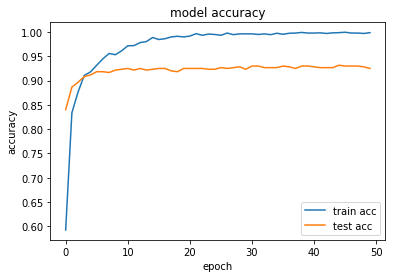

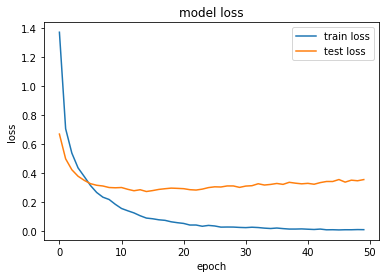

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [17]:
!tensorboard --logdir=tensorboard/mnist_small/

TensorBoard 1.12.2 at http://a3d53590cc54:6006 (Press CTRL+C to quit)
^C
